
# CPE 313 : Advanced Machine Learning with Deep Learning
## HOA 1.1 Using Tensorflow with a Real Dataset

*   Name: Peña, Vhan Randolp

---



## Google Colab Link

https://colab.research.google.com/drive/15BQIaBcShRXMoaqmbIqPnivb8h6nHAGr#scrollTo=qObZOxkVf2sA

# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

* Demonstrate csv file manipulation using Pandas.
* Examine a given data.
* Experiment with different features in building a model.
* Demonstrate tuning a model's hyperparameters.

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [1]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [2]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [3]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

<p align = 'justify'>   There are anomalies in the data. We can observe that the mean of some columns were far from the maximum values yet has a fair difference to the minimum value. I think we can infer from the statistics that the data in these columns are right skewed.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [4]:
def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  model.add(
      tf.keras.layers.Dense(
          units = 1,
          input_shape = (1,)
      )
  )

  model.compile(
      optimizer = tf.keras.optimizers.experimental.RMSprop(
          learning_rate = my_learning_rate
      ),
      loss = 'mean_squared_error',
      metrics = [tf.keras.metrics.RootMeanSquaredError()]
  )

  return model

<p align = "justify"> In this section, a function, build_model, is created. This function creates the structure of the model to be used with Sequential function that creates layers in linear order. There is also a defined evaluation for the structure of the model which is compiled with the optimizer, the loss function being the MSE, and our main metris which is the tensorflow RMSE.

In [5]:
def train_model(model, data, feature, label, epochs, batch_size):

  fitted_data = model.fit(
      x = data[feature],
      y = data[label],
      batch_size = batch_size,
      epochs = epochs
  )
  # We fitted the data with the created model.

  weights = model.get_weights()[0]
  biases = model.get_weights()[1]
  # Retrieval of the weight and bias for the function get_weight where the weight defines the strenght of
    # connection between the layers while the bias refers to the influence of each feature to the label.


  epochs = fitted_data.epoch

  hist = pd.DataFrame(
      fitted_data.history
  )
  # Getting the history where it contains the number of batches, the learning rate, the loss
    #function value and the RMSE.


  rmse = hist["root_mean_squared_error"]
  # Storing the value of RMSE into another value for easier retrieval.
  return weights, biases, epochs, rmse

This code refers to the model training where it passes the model, data, feature, label, epochs, and batch_size. This training includes the fitting of data, retrieval of the weights and bias with the get_weights function and also getting the RMSE with the epochs variable.

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [6]:
def plot_the_model(weight, bias, feature, label):

  rand = training_df.sample(
      n = 200
  )

  plt.scatter(
      rand[feature],
      rand[label]
  )

  x0 = 0
  y0 = bias
  x1 = rand[feature].max()
  y1 = bias + (weight * x1)

  plt.plot([x0, x1], [y0, y1], color = 'r')

  plt.xlabel(feature)
  plt.ylabel(label)

  plt.show

This function visualizes the data in scatterplot overlaying the regression line formed through the model. We get 200 samples and perform the plotting of the label with regards to the feature. Then, visualizing the regression line with the weight and bias create it with read color along with the labels, formats, and othher.

In [7]:
def plot_the_loss_curve(epochs, rmse):

  plt.figure()

  plt.plot( epochs, rmse, label = 'loss')
  plt.legend()

  plt.xlabel("Epoch")
  plt.ylabel("RMSE")

  plt.ylim([rmse.min()*0.97, rmse.max()])

  plt.show()

This function visualizes the loss curve via plotting the RMSE value with regards to the epoch.

## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


Epoch 1/30
567/567 [==============================] - 4s 5ms/step - loss: 238775.0312 - root_mean_squared_error: 488.6461
Epoch 2/30
567/567 [==============================] - 3s 5ms/step - loss: 27762.1699 - root_mean_squared_error: 166.6198
Epoch 3/30
567/567 [==============================] - 4s 8ms/step - loss: 27106.9297 - root_mean_squared_error: 164.6418
Epoch 4/30
567/567 [==============================] - 5s 8ms/step - loss: 26387.2539 - root_mean_squared_error: 162.4415
Epoch 5/30
567/567 [==============================] - 3s 5ms/step - loss: 25556.1113 - root_mean_squared_error: 159.8628
Epoch 6/30
567/567 [==============================] - 3s 5ms/step - loss: 24953.9414 - root_mean_squared_error: 157.9682
Epoch 7/30
567/567 [==============================] - 1s 2ms/step - loss: 24328.4395 - root_mean_squared_error: 155.9758
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 23577.5684 - root_mean_squared_error: 153.5499
Epoch 9/30
567/567 [===========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


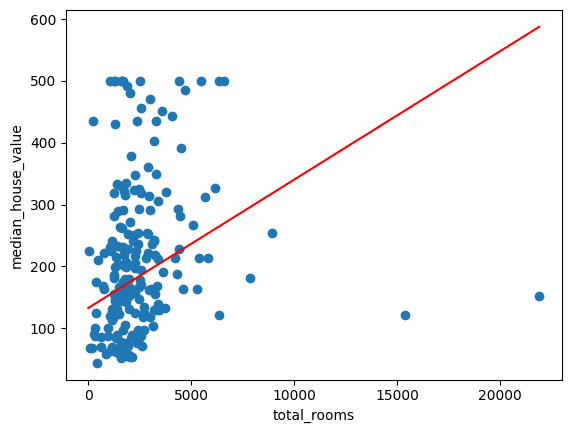

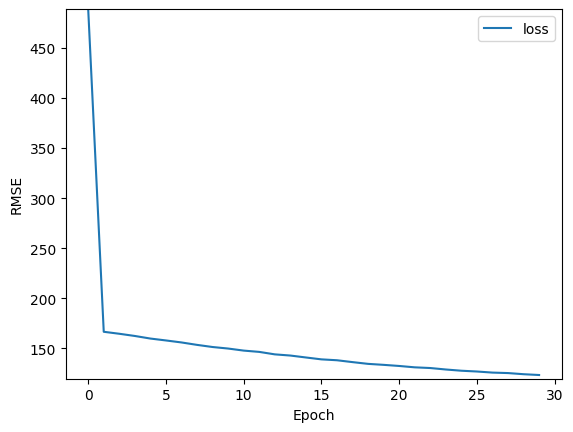

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Although the regression line captures some good distance in the small value of the total_rooms, it wasn't able to produce a best regression line as there is an imbalance or skewness to the data itself.

I think that the loss function is in the acceptable rangeeven though the line isn't that smoothly, it presents the changes in the RMSE in every epoch taken. In addition to that, I think that it has a good RMSE as the regression line has been hit most of the small value of total rooms.

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [9]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [10]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             173
 3400     92             203
 3677     69             209
 2202     62             178
 2403     80             183
 5652    295             250
 3318    500             202
 2552    342             186
 1364    118             161
 3468    128             205


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

**<p align = "justify"> The predicted value were far from the actual value of the labels so we can say that the model isn't persuasive enough. However, the model only contains 10 entries which isn't sufficient to build a more reliable and more accurate prediction model.**

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/3
142/142 [==============================] - 1s 1ms/step - loss: 3654117.7500 - root_mean_squared_error: 1911.5747
Epoch 2/3
142/142 [==============================] - 0s 2ms/step - loss: 3291892.5000 - root_mean_squared_error: 1814.3573
Epoch 3/3
142/142 [==============================] - 0s 2ms/step - loss: 2829585.5000 - root_mean_squared_error: 1682.1372


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


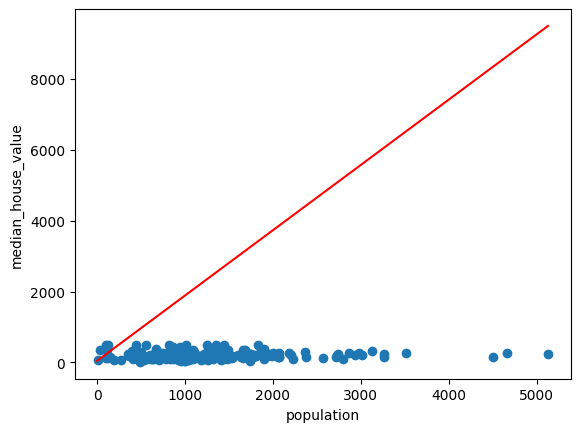

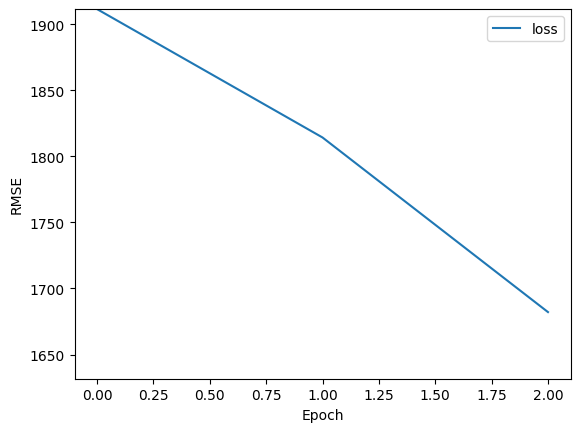

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53            2418
 1867     92            3490
 2191     69            4087
 1052     62            1986
 1647     80            3084
 2312    295            4310
 1604    500            3004
 1066    342            2012
  338    118             670
 1604    128            3004
 1200    187            2259
  292     80             585
 2014    112            3761
 1817     95            3397
 1328     69            2495


In [11]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 2
epochs = 3
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

The parameters and the regression line isn't all good as it missed most of the data and achieved a high distance between the regresssion line and the values of population. The value of RMSE is unacceptable as it stopped in 1700 value means that there are more error or more distannce to the regression line.

Epoch 1/16
142/142 [==============================] - 1s 2ms/step - loss: 972696.3750 - root_mean_squared_error: 986.2537
Epoch 2/16
142/142 [==============================] - 0s 1ms/step - loss: 548244.5000 - root_mean_squared_error: 740.4354
Epoch 3/16
142/142 [==============================] - 0s 2ms/step - loss: 255404.8125 - root_mean_squared_error: 505.3759
Epoch 4/16
142/142 [==============================] - 0s 2ms/step - loss: 86605.1719 - root_mean_squared_error: 294.2876
Epoch 5/16
142/142 [==============================] - 0s 2ms/step - loss: 32796.3672 - root_mean_squared_error: 181.0977
Epoch 6/16
142/142 [==============================] - 0s 1ms/step - loss: 30861.4395 - root_mean_squared_error: 175.6742
Epoch 7/16
142/142 [==============================] - 0s 2ms/step - loss: 30802.9141 - root_mean_squared_error: 175.5076
Epoch 8/16
142/142 [==============================] - 0s 1ms/step - loss: 30838.7031 - root_mean_squared_error: 175.6095
Epoch 9/16
142/142 [=========

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


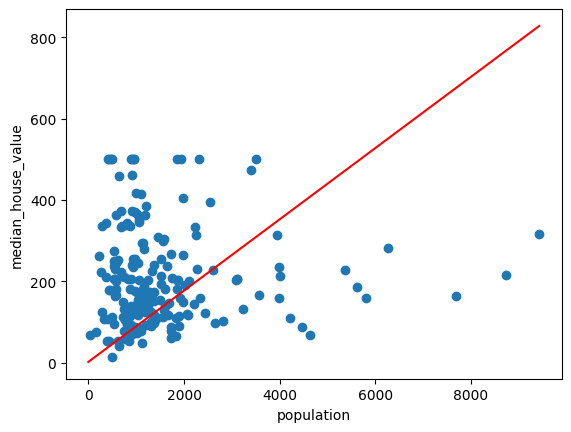

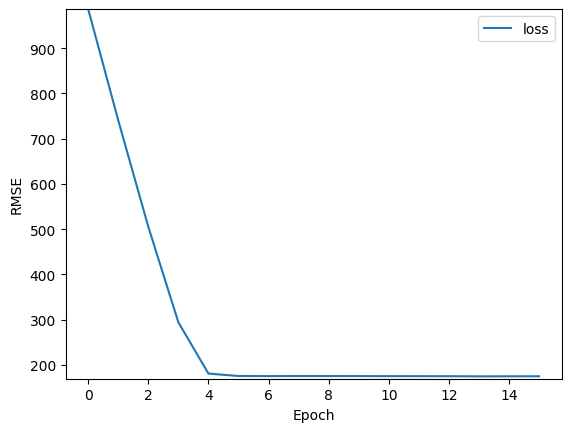

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             115
 1867     92             166
 2191     69             194
 1052     62              94
 1647     80             146
 2312    295             205
 1604    500             143
 1066    342              96
  338    118              32
 1604    128             143
 1200    187             107
  292     80              28
 2014    112             179
 1817     95             161
 1328     69             118


In [12]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.001
epochs = 16
batch_size = 120

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

The parameters of this model is quite good as it achieved small value of RMSE. Also, the regression line still isn't that great but it traced numerous amount of data which what we're aiming.

Epoch 1/30
567/567 [==============================] - 2s 2ms/step - loss: 63180.8242 - root_mean_squared_error: 251.3580
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 30634.6934 - root_mean_squared_error: 175.0277
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 29699.0566 - root_mean_squared_error: 172.3341
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 28741.1914 - root_mean_squared_error: 169.5323
Epoch 5/30
567/567 [==============================] - 1s 2ms/step - loss: 27934.7422 - root_mean_squared_error: 167.1369
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 27042.7793 - root_mean_squared_error: 164.4469
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 26568.8691 - root_mean_squared_error: 162.9996
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 25889.0801 - root_mean_squared_error: 160.9008
Epoch 9/30
567/567 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


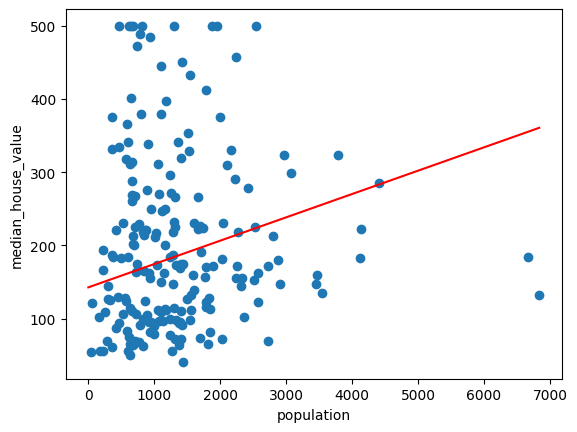

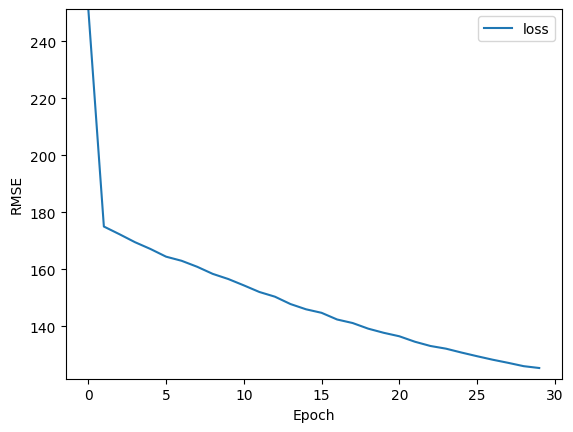

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             184
 1867     92             202
 2191     69             213
 1052     62             176
 1647     80             195
 2312    295             217
 1604    500             194
 1066    342             177
  338    118             154
 1604    128             194
 1200    187             181
  292     80             152
 2014    112             207
 1817     95             201
 1328     69             185


In [13]:
my_feature = "population"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

<p align = 'justify'> The population didn't produce better predictions than total rooms. From the population to median_house_value graph, the regression line is far to off from the actual values. In addition to that, the slope from the epoch to rmse graph is definitely decline however, the RMSE value were still high implying that the errors are large and there's a large difference between the predicted and actual value.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

Epoch 1/25
567/567 [==============================] - 1s 1ms/step - loss: 39747.4023 - root_mean_squared_error: 199.3675
Epoch 2/25
567/567 [==============================] - 1s 1ms/step - loss: 21325.3848 - root_mean_squared_error: 146.0321
Epoch 3/25
567/567 [==============================] - 1s 1ms/step - loss: 15808.5342 - root_mean_squared_error: 125.7320
Epoch 4/25
567/567 [==============================] - 1s 1ms/step - loss: 15028.4990 - root_mean_squared_error: 122.5908
Epoch 5/25
567/567 [==============================] - 1s 1ms/step - loss: 14873.8037 - root_mean_squared_error: 121.9582
Epoch 6/25
567/567 [==============================] - 1s 1ms/step - loss: 14652.9785 - root_mean_squared_error: 121.0495
Epoch 7/25
567/567 [==============================] - 1s 1ms/step - loss: 14511.0967 - root_mean_squared_error: 120.4620
Epoch 8/25
567/567 [==============================] - 1s 1ms/step - loss: 14337.5693 - root_mean_squared_error: 119.7396
Epoch 9/25
567/567 [============

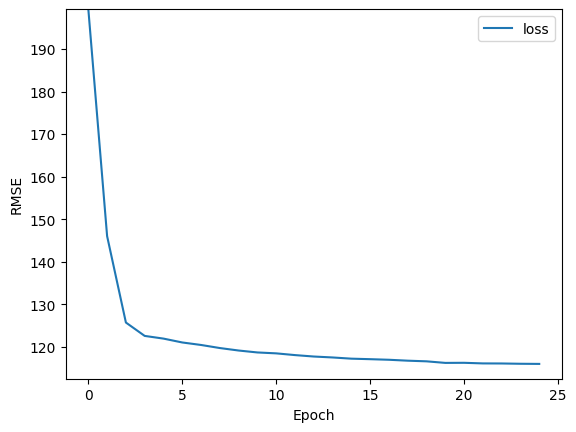

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             194
    2     62             211
    1     80             185
    2    295             226
    2    500             210
    2    342             224
    4    118             290
    2    128             214
    2    187             224
    3     80             235
    2    112             225
    2     95             219
    2     69             210


In [14]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df['total_rooms']/training_df['population'] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.05
epochs = 25
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

For the graph of the loss function, the parameters lowered the value of the RMSE compared to the previous trials which is around 120. Therefore, we can atleast say that this model works much better than others.

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [15]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

<p align = 'justify'> The feature that has the most potential to produce a more accurate model is the median_income. Among the features along the median_house_values, it mostly have correlation within -0.1 to 0.2 which implies that there is only weak correlation within the feature and the label. On the other hand, the median_income has a correlation of 0.7 which can be considered a strong positive correlation to the label.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

In [16]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.